<a href="https://colab.research.google.com/github/adeviney/customer-retention-model/blob/main/DataCleaningandEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Data Gathering

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo Bootcamp/Project 2/WA_Fn-UseC_-Telco-Customer-Churn[1].csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [172]:
df.duplicated().sum()

0

In [173]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Values

> The TotalCharges column should be a float64 dtype, but it is being read as an object due to some rows having a missing value filled in with the space character. Below I have replaced each of the missing values with a 0.

In [175]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '')
df['TotalCharges'].fillna(0)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [176]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> No more missing values! Now I will change the TotalCharges column to a numeric datatype:

In [177]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

### Consistent Mapping of Data

> SeniorCitizen should not be a numerical datatype, since it is a categorical column. The other categorical columns use "Yes/No" labeling, so I will use this convention to maintain consistency.

In [178]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: "No", 1: "Yes"})

### Numeric Columns

In [179]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


> No apparent outliers, but will explore further in the exploratory data visualization.

### Categorical Columns

In [180]:
# checking for inconsistencies in categorical data
data_types = df.dtypes
str_cols = data_types[data_types =='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n****************")

- customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

****************
- gender:
Male      3555
Female    3488
Name: gender, dtype: int64

****************
- SeniorCitizen:
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

****************
- Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

****************
- Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

****************
- PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

****************
- MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

****************
- InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

****************
- OnlineSecurity:
No             

In [181]:
# each row is a unique customer
df[['customerID']].duplicated().sum()

0

> Data is clean!

## Exploratory Data Visualization 

### Univarate Visuals for Features

#### Categorical

In [182]:
str_cols = data_types[data_types =='object'].index
str_cols = np.delete(str_cols, [0,17])
str_cols
# deleting customerID -- already confirmed that each row is unique and this isn't something we need to visualize
# deleting Churn -- this is the target, not a feature
str_cols.size

16

In [183]:
str_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

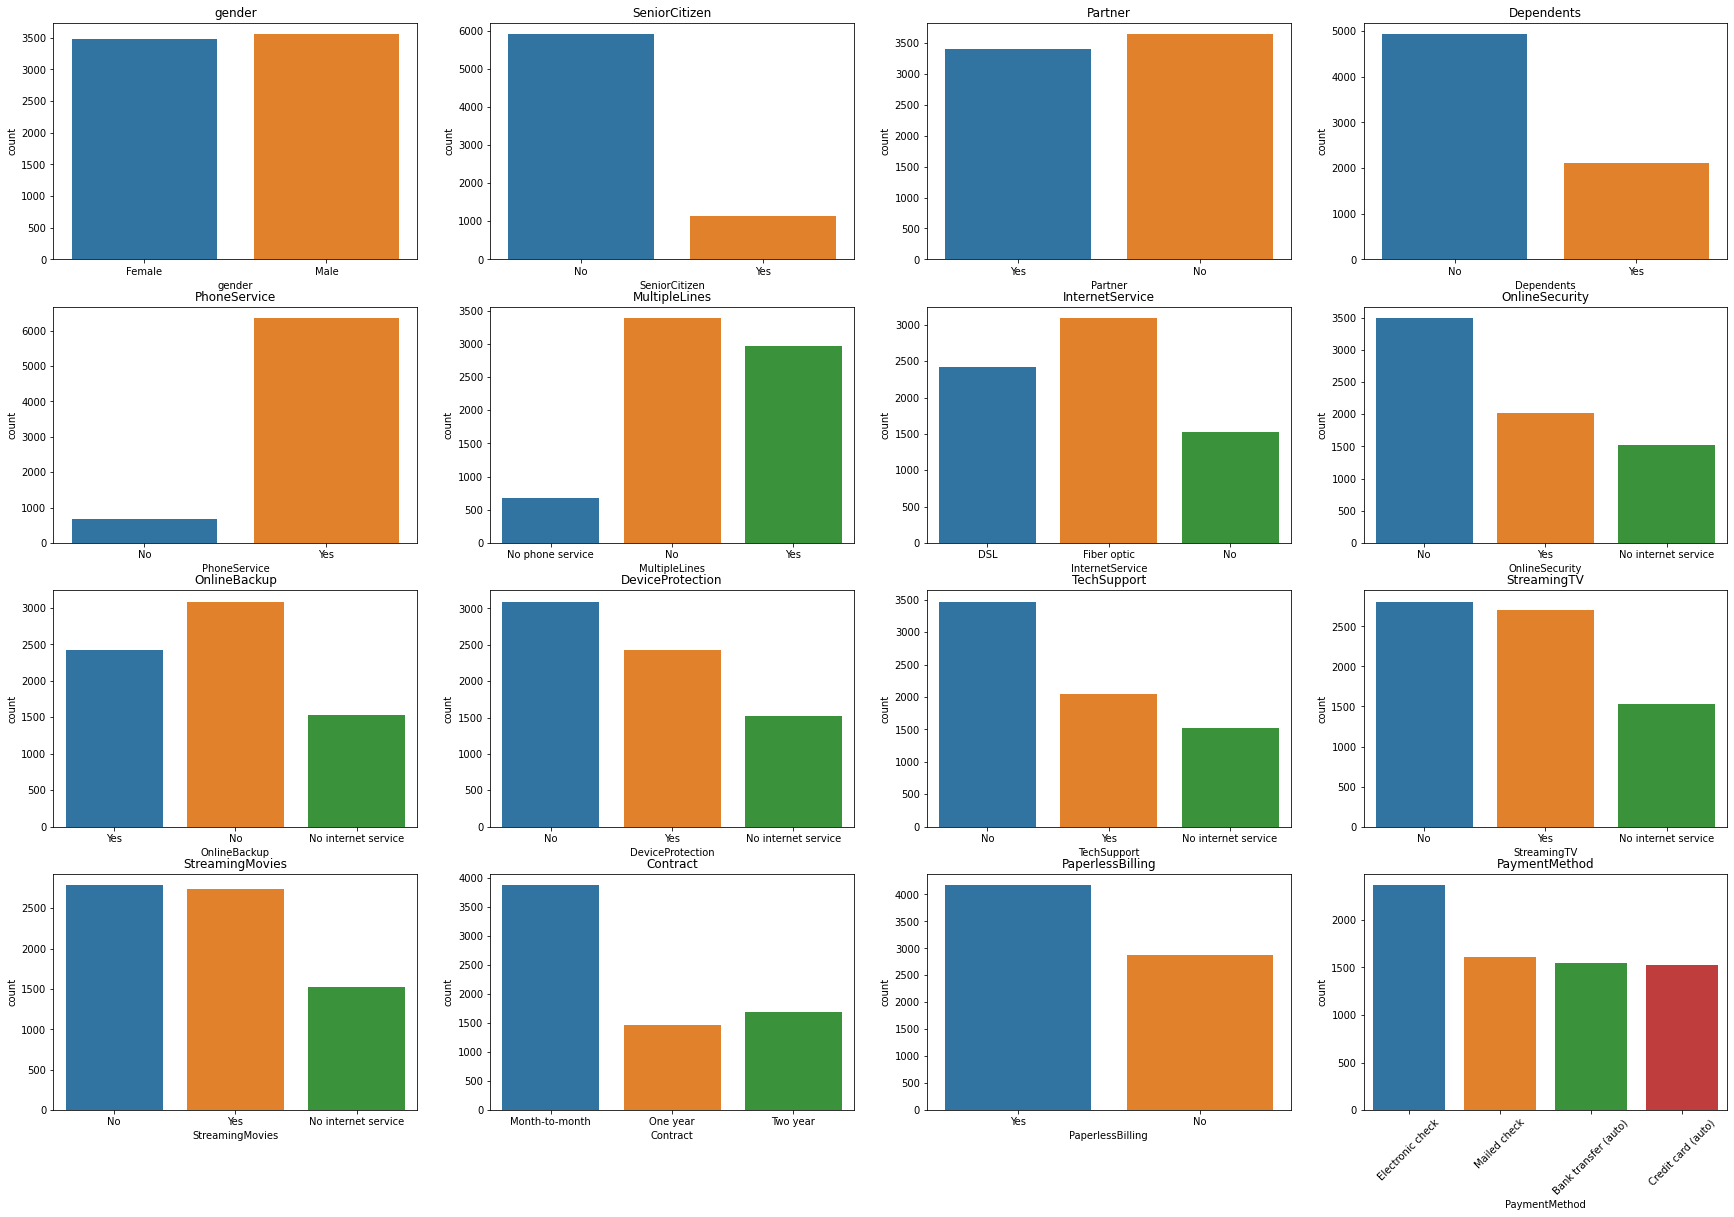

In [184]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
axes = axes.flatten()

for i, col in zip(range(0, str_cols.size), str_cols):
    sns.countplot(data = df, x = col, ax = axes[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    axes[i].set_title(col)

# fixing readability of PaymentMethod graph
axes[15].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer (auto)', 'Credit card (auto)'], rotation = 45);

#### Numeric

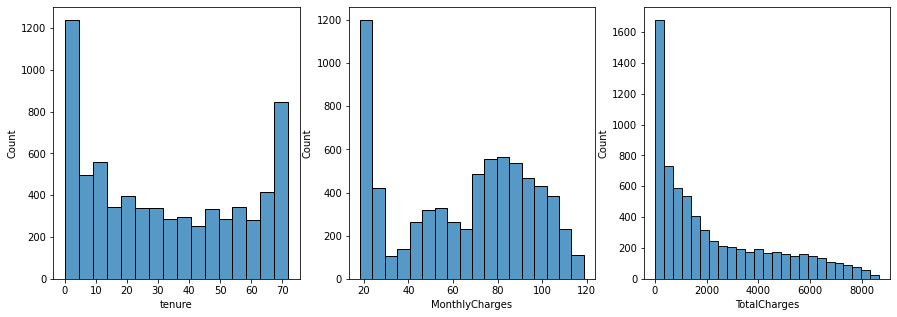

In [185]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.histplot(data = df, x = 'tenure', ax  = axes[0])
sns.histplot(data = df, x = 'MonthlyCharges', ax  = axes[1])
sns.histplot(data = df, x = 'TotalCharges', ax  = axes[2])

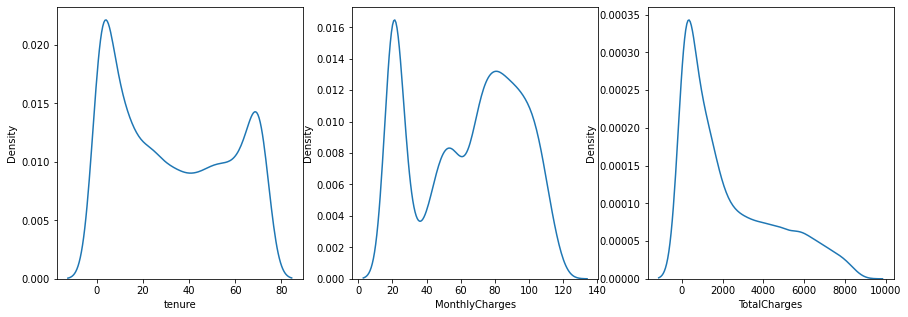

In [186]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.kdeplot(data = df, x = 'tenure', ax  = axes[0])
sns.kdeplot(data = df, x = 'MonthlyCharges', ax  = axes[1])
sns.kdeplot(data = df, x = 'TotalCharges', ax  = axes[2])

I'd also like to consider the difference between the TotalCharges and the product of MonthlyCharges and tenure. Theoretically, these would be the same, but it is apparent that there is a difference for some customers. This might prove fruitful in later analysis.

In [187]:
df['TotalCharges_Diff'] = df['MonthlyCharges'] * df['tenure'] - df['TotalCharges']

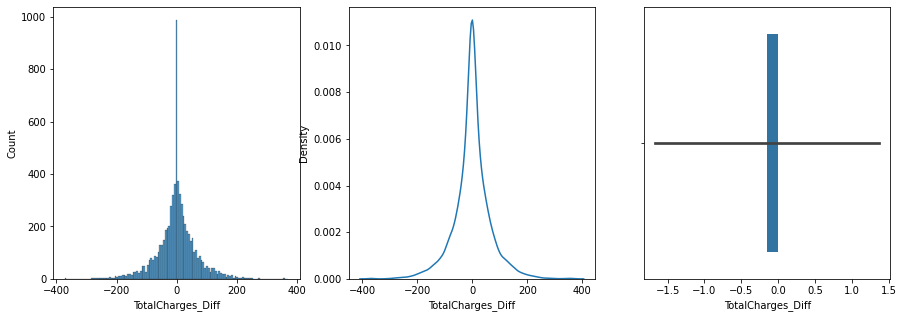

In [188]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.histplot(data = df, x = 'TotalCharges_Diff', ax = axes[0])
sns.kdeplot(data = df, x = 'TotalCharges_Diff', ax = axes[1])
sns.barplot(data = df, x = 'TotalCharges_Diff', ax = axes[2])

Initial Exploration of Multivarate Relationships:

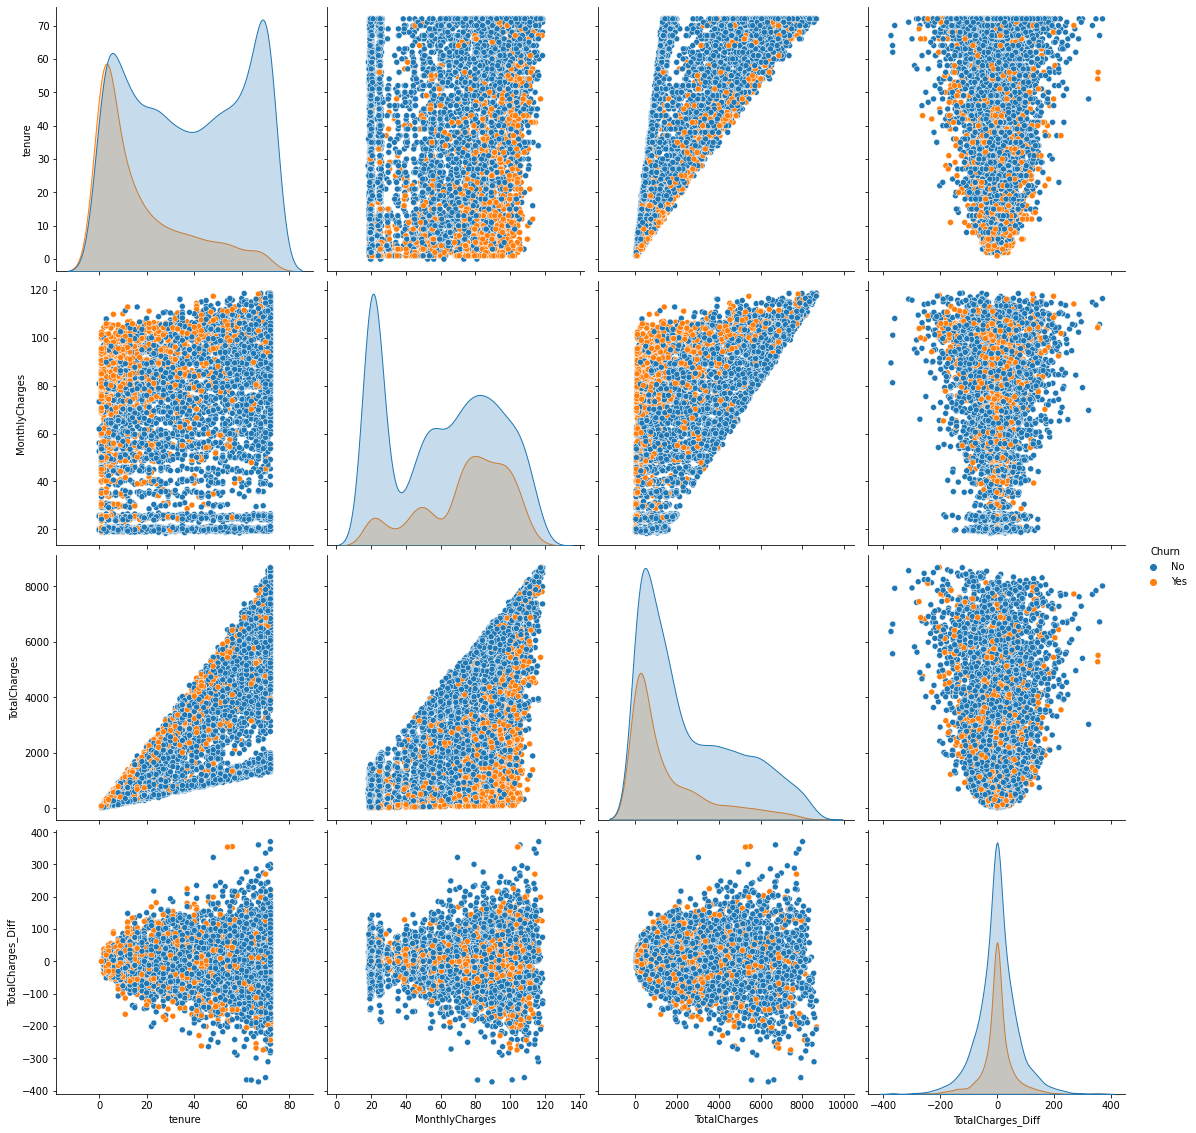

In [189]:
sns.pairplot(data = df, height = 4, hue = 'Churn')

### Target

In [190]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [191]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

> This is an unbalanced data set. Good to keep in mind for the modeling stage.

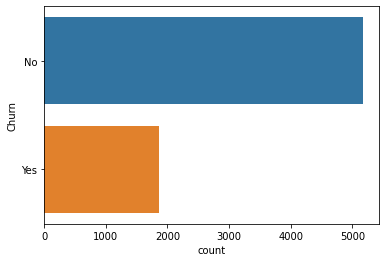

In [192]:
sns.countplot(data = df, y = 'Churn')